# Univariate time series forecasting:

In this code the results of timeseries forecasting for 12 different datasets have been collected. One-step ahead recursive forecasting have been used on each one of them as a univariate time series forecasting problem.
The collected data has been plotted based on metrics used. RMSE (root mean squared error) and MLSE (mean logarithmic squared error) have been used as our metrics for comparison.

List of approaches:
- classical methods such as SARIMA or ARIMA
- Multilayar Perceptron MLP
- Stacked Unidirectional and Bidirectional Long Short Term Memory networks LSTM
- Recurrent Neural Networks RNN
- Gated Recurrent Unit GRU
- Convolution based networks CNN-LSTM
- Dilated Causal Convolutions DC-CNN
- SeriesNet
- WaveNet

Sources of datasets: 
- https://github.com/PacktPublishing/Practical-Time-Series-Analysis-V-/tree/master/Data%20Files
- https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs

In [ ]:
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

## agg backend is used to create plot as a .png file
mpl.use('agg')

In [2]:
with open('/home/ahmada59/py/NN_BGH.pkl', 'rb') as f1:
    Metrics_BGH = pickle.load(f1)

with open('/home/ahmada59/py/NN_CO2Concentrations.pkl', 'rb') as f2:
    Metrics_CO2Concentrations = pickle.load(f2)

with open('/home/ahmada59/py/NN_HDAW.pkl', 'rb') as f3:
    Metrics_HDAW = pickle.load(f3)
    
with open('/home/ahmada59/py/NN_ADES.pkl', 'rb') as f4:
    Metrics_ADES = pickle.load(f4)

with open('/home/ahmada59/py/NN_AAL.pkl', 'rb') as f5:
    Metrics_AAL = pickle.load(f5)
    
with open('/home/ahmada59/py/NN_CIBR.pkl', 'rb') as f6:
    Metrics_CIBR = pickle.load(f6)

with open('/home/ahmada59/py/NN_BVXV.pkl', 'rb') as f7:
    Metrics_BVXV = pickle.load(f7)

with open('/home/ahmada59/py/NN_QRVO.pkl', 'rb') as f8:
    Metrics_QRVO = pickle.load(f8)

with open('/home/ahmada59/py/NN_JPEM.pkl', 'rb') as f9:
    Metrics_JPEM = pickle.load(f9)

with open('/home/ahmada59/py/NN_AFI.pkl', 'rb') as f10:
    Metrics_AFI = pickle.load(f10)
    
with open('/home/ahmada59/py/NN_FDC.pkl', 'rb') as f11:
    Metrics_FDC = pickle.load(f11)
    
with open('/home/ahmada59/py/NN_ZBIO.pkl', 'rb') as f12:
    Metrics_ZBIO = pickle.load(f12)

f1.close()
f2.close()
f3.close()
f4.close()
f5.close()
f6.close()
f7.close()
f8.close()
f9.close()
f10.close()
f11.close()
f12.close()

In [3]:
metrics = dict()
metrics['BGH']= Metrics_BGH
metrics['CO2Concentrations'] = Metrics_CO2Concentrations
metrics['HDAW'] = Metrics_HDAW
metrics['ADES'] = Metrics_ADES
metrics['AAL'] = Metrics_AAL
metrics['CIBR'] = Metrics_CIBR
metrics['BVXV'] = Metrics_BVXV
metrics['QRVO'] = Metrics_QRVO
metrics['JPEM'] = Metrics_JPEM
metrics['AFI'] = Metrics_AFI
metrics['FDC'] = Metrics_FDC
metrics['ZBIO'] = Metrics_ZBIO

In [4]:
models = ['ARIMA', 'MLP', 'LSTM', 'SUL', 'BL', 'SBL', 'CNN-LSTM', 'RNN', 'GRU', 'DCCNN', 'SN1', 'WN']
# names are actually names of data sets.
names = ['BGH', 'CO2Concentrations', 'AAL', 'CIBR', 'HDAW', 'ADES', 'BVXV', 'QRVO', 'JPEM', 'AFI', 'FDC', 'ZBIO']

In [5]:
df = pd.DataFrame()
for name in names:
    MSLE = []
    RMSE = []
    MAPE = []
    SMAPE = []
    list_of_models = []
    for model in models:
        for key in metrics[name].keys():
            if key.split(sep='_')[1] == model:
                if key.split(sep='_')[0] == 'MSLE':
                    MSLE.append(metrics[name][key])
                if key.split(sep='_')[0] == 'RMSE':
                    RMSE.append(metrics[name][key])
                if key.split(sep='_')[0] == 'MAPE':
                    MAPE.append(metrics[name][key])
                if key.split(sep='_')[0] == 'SMAPE':
                    SMAPE.append(metrics[name][key])
                    list_of_models.append(model)
    temporarydf = pd.DataFrame({"RMSE": RMSE, "MSLE": MSLE, "MAPE": MAPE, "SMAPE": SMAPE,
                                "Model": list_of_models, "Dataset": [name for i in range(len(models))]},
                               index= (i for i in range(len(models))))
    df = df.append(temporarydf, ignore_index = True)

In [6]:
df.tail()

,RMSE,MSLE,MAPE,SMAPE,Model,Dataset
139,0.017739,0.000272,1000.0,1000.000000,RNN,ZBIO
140,0.036723,0.001179,1000.0,11238.797727,GRU,ZBIO
141,0.060809,0.003056,1000.0,11909.384696,DCCNN,ZBIO
142,0.014521,0.000176,1000.0,12447.098932,SN1,ZBIO
143,0.108371,0.010187,1000.0,1000.000000,WN,ZBIO


making boxplots:

Averaging LSTM and SUL models:

In [7]:
MSLE = ((df[df.Model == 'LSTM'].MSLE.values + df[df.Model == 'SUL'].MSLE.values)/2).tolist()
RMSE = ((df[df.Model == 'LSTM'].RMSE.values + df[df.Model == 'SUL'].RMSE.values)/2).tolist()
MAPE = ((df[df.Model == 'LSTM'].MAPE.values + df[df.Model == 'SUL'].MAPE.values)/2).tolist()
SMAPE = ((df[df.Model == 'LSTM'].SMAPE.values + df[df.Model == 'SUL'].SMAPE.values)/2).tolist()
if df[df.Model == 'LSTM'].Dataset.values.tolist() != df[df.Model == 'SUL'].Dataset.values.tolist():
    raise ValueError('The order of LSTM and SUL subsets are not identical.')
    
temporarydf = pd.DataFrame({"RMSE": RMSE, "MSLE": MSLE, "MAPE": MAPE, "SMAPE": SMAPE,
                                "Model": ['LSTM_ave' for i in range(len(names))], 
                                "Dataset": df[df.Model == 'LSTM'].Dataset.values.tolist()},
                           index= (i for i in range(len(names))))
df = df.append(temporarydf, ignore_index = True)

Averaging Bidirectional LSTM and SBL models: 

In [8]:
MSLE = ((df[df.Model == 'BL'].MSLE.values + df[df.Model == 'SBL'].MSLE.values)/2).tolist()
RMSE = ((df[df.Model == 'BL'].RMSE.values + df[df.Model == 'SBL'].RMSE.values)/2).tolist()
MAPE = ((df[df.Model == 'BL'].MAPE.values + df[df.Model == 'SBL'].MAPE.values)/2).tolist()
SMAPE = ((df[df.Model == 'BL'].SMAPE.values + df[df.Model == 'SBL'].SMAPE.values)/2).tolist()
if df[df.Model == 'BL'].Dataset.values.tolist() != df[df.Model == 'SBL'].Dataset.values.tolist():
    raise ValueError('The order of BL and SBL subsets are not identical.')
    
temporarydf = pd.DataFrame({"RMSE": RMSE, "MSLE": MSLE, "MAPE": MAPE, "SMAPE": SMAPE,
                                "Model": ['BLSTM_ave' for i in range(len(names))], 
                                "Dataset": df[df.Model == 'BL'].Dataset.values.tolist()},
                           index= (i for i in range(len(names))))
df = df.append(temporarydf, ignore_index = True)

# Making Boxplots:

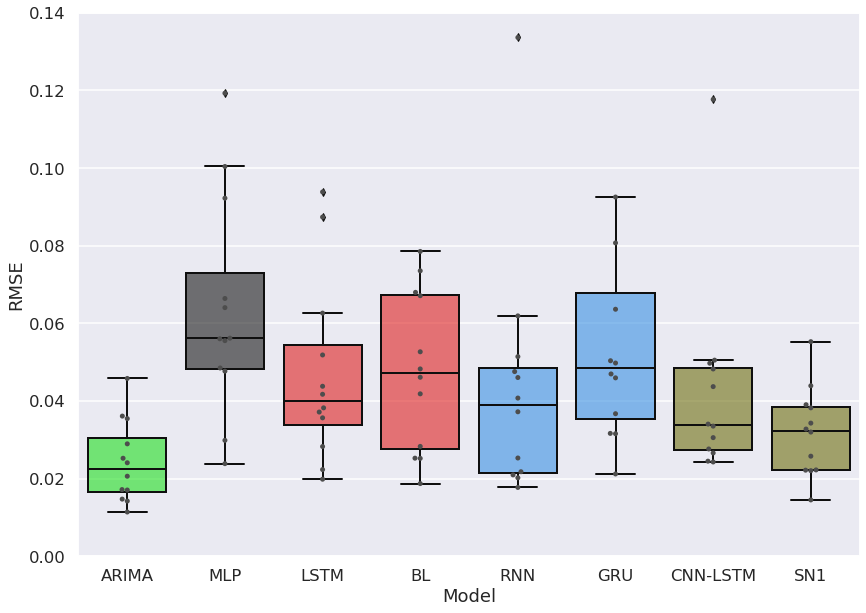

In [10]:
fig, ax1 = plt.subplots(figsize = (14,10))
sns.set(style="darkgrid", context="talk")
my_pal = {"ARIMA": "lime", "MLP": "k", "LSTM_ave":"red", "BLSTM_ave":"red", "LSTM":"red", "BL":"red",
          "RNN":"dodgerblue", "GRU":"dodgerblue", 
          "CNN-LSTM":"olive", "DCCNN":"olive", "SN1":"olive"}
sns.boxplot(data=df, ax=ax1, x="Model", y="RMSE", linewidth=2, 
            order=['ARIMA', 'MLP', 'LSTM', 'BL', 'RNN', 'GRU', 'CNN-LSTM', 'SN1'],
           palette=my_pal)
sns.swarmplot(data=df, ax=ax1, x="Model", y="RMSE", color="0.3",
            order=['ARIMA', 'MLP', 'LSTM', 'BL', 'RNN', 'GRU', 'CNN-LSTM', 'SN1'])
# Add transparency to colors
for patch in ax1.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .6))

plt.ylim(0, 0.14)
fig = ax1.get_figure()
fig.savefig("results1.png")

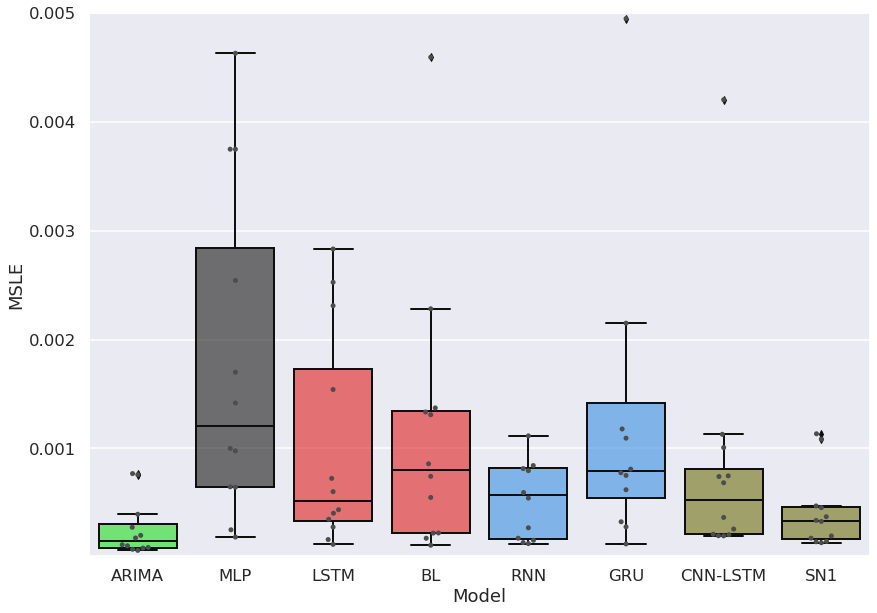

In [11]:
fig, ax2 = plt.subplots(figsize = (14,10))
sns.set(style="darkgrid", context="talk")
sns.boxplot(data=df, ax=ax2, x="Model", y="MSLE", linewidth=2, 
            order=['ARIMA', 'MLP', 'LSTM', 'BL', 'RNN', 'GRU', 'CNN-LSTM', 'SN1'],
           palette=my_pal)
sns.swarmplot(data=df, ax=ax2, x="Model", y="MSLE", color="0.3",
            order=['ARIMA', 'MLP', 'LSTM', 'BL', 'RNN', 'GRU', 'CNN-LSTM', 'SN1'])

# Add transparency to colors
for patch in ax2.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .6))

plt.yscale("linear")
plt.ylim(1e-5, 0.005)
fig = ax2.get_figure()
fig.savefig("results2.png")

# Taking into account stacked layers of LSTM or Bidirectional LSTM:

Taking the best of LSTM and SUL:

In [12]:
MSLE = [0 for i in range(len(names))]
RMSE = [0 for i in range(len(names))]
MAPE = [0 for i in range(len(names))]
SMAPE = [0 for i in range(len(names))]
for i in range(len(names)):
    MSLE[i] = min(df[df.Model == 'LSTM'].MSLE.tolist()[i],df[df.Model == 'SUL'].MSLE.tolist()[i])
    RMSE[i] = min(df[df.Model == 'LSTM'].RMSE.tolist()[i], df[df.Model == 'SUL'].RMSE.tolist()[i])
    MAPE[i] = min(df[df.Model == 'LSTM'].MAPE.tolist()[i], df[df.Model == 'SUL'].MAPE.tolist()[i])
    SMAPE[i] = min(df[df.Model == 'LSTM'].SMAPE.tolist()[i], df[df.Model == 'SUL'].SMAPE.tolist()[i])

if df[df.Model == 'LSTM'].Dataset.values.tolist() != df[df.Model == 'SUL'].Dataset.values.tolist():
    raise ValueError('The order of LSTM and SUL subsets are not identical.')
    
temporarydf = pd.DataFrame({"RMSE": RMSE, "MSLE": MSLE, "MAPE": MAPE, "SMAPE": SMAPE,
                                "Model": ['LSTM or SUL' for i in range(len(names))], 
                                "Dataset": df[df.Model == 'LSTM'].Dataset.values.tolist()},
                           index= (i for i in range(len(names))))
df = df.append(temporarydf, ignore_index = True)

Taking the best uf BL and SBL:

In [13]:
MSLE = [0 for i in range(len(names))]
RMSE = [0 for i in range(len(names))]
MAPE = [0 for i in range(len(names))]
SMAPE = [0 for i in range(len(names))]
for i in range(len(names)):
    MSLE[i] = min(df[df.Model == 'BL'].MSLE.tolist()[i],df[df.Model == 'SBL'].MSLE.tolist()[i])
    RMSE[i] = min(df[df.Model == 'BL'].RMSE.tolist()[i], df[df.Model == 'SBL'].RMSE.tolist()[i])
    MAPE[i] = min(df[df.Model == 'BL'].MAPE.tolist()[i], df[df.Model == 'SBL'].MAPE.tolist()[i])
    SMAPE[i] = min(df[df.Model == 'BL'].SMAPE.tolist()[i], df[df.Model == 'SBL'].SMAPE.tolist()[i])

if df[df.Model == 'BL'].Dataset.values.tolist() != df[df.Model == 'SBL'].Dataset.values.tolist():
    raise ValueError('The order of BL and SBL subsets are not identical.')
    
temporarydf = pd.DataFrame({"RMSE": RMSE, "MSLE": MSLE, "MAPE": MAPE, "SMAPE": SMAPE,
                                "Model": ['BL or SBL' for i in range(len(names))], 
                                "Dataset": df[df.Model == 'BL'].Dataset.values.tolist()},
                           index= (i for i in range(len(names))))
df = df.append(temporarydf, ignore_index = True)

(0, 0.14)

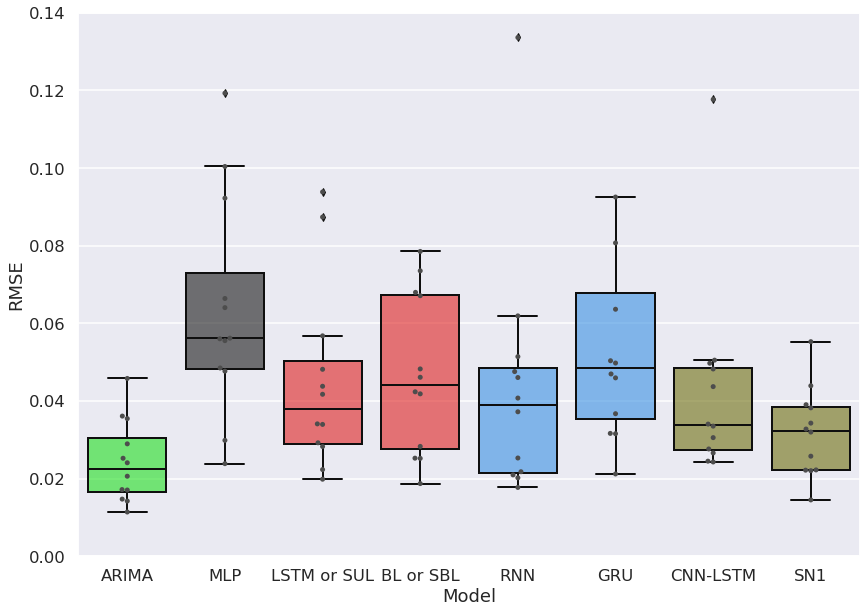

In [14]:
fig, ax3 = plt.subplots(figsize = (14,10))
sns.set(style="darkgrid", context="talk")
my_pal = {"ARIMA": "lime", "MLP": "k", "LSTM_ave":"red", "BLSTM_ave":"red", "LSTM":"red", "BL":"red",
          "LSTM or SUL":"red", "BL or SBL":"red",
          "RNN":"dodgerblue", "GRU":"dodgerblue", 
          "CNN-LSTM":"olive", "DCCNN":"olive", "SN1":"olive"}
sns.boxplot(data=df, ax=ax3, x="Model", y="RMSE", linewidth=2, 
            order=['ARIMA', 'MLP', 'LSTM or SUL', 'BL or SBL', 'RNN', 'GRU', 'CNN-LSTM', 'SN1'],
           palette=my_pal)
sns.swarmplot(data=df, ax=ax3, x="Model", y="RMSE", color="0.3",
            order=['ARIMA', 'MLP', 'LSTM or SUL', 'BL or SBL', 'RNN', 'GRU', 'CNN-LSTM', 'SN1'])
# Add transparency to colors
for patch in ax3.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .6))

plt.ylim(0, 0.14)
#fig = ax3.get_figure()
#fig.savefig("results1.png")

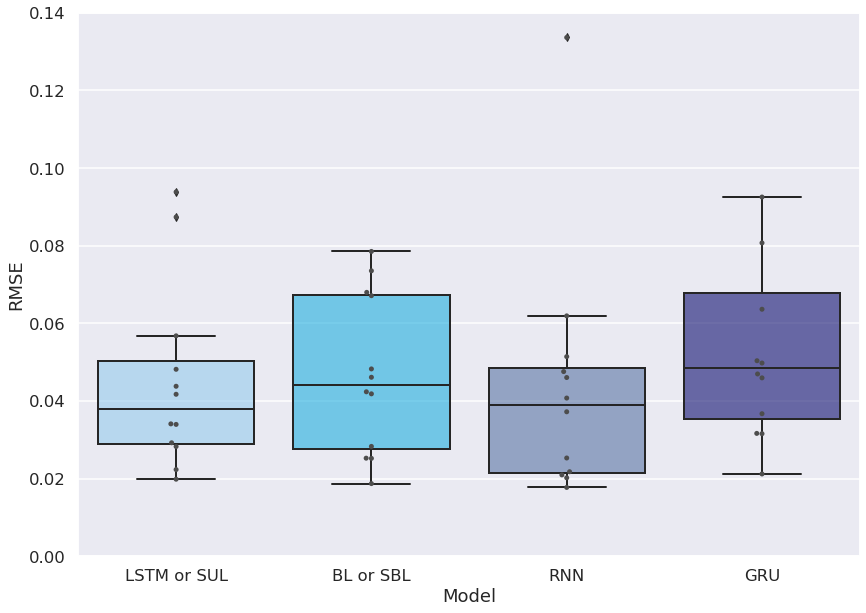

In [16]:
fig, ax3 = plt.subplots(figsize = (14,10))
sns.set(style="darkgrid", context="talk")
pal = {"LSTM or SUL":"lightskyblue", "BL or SBL":"deepskyblue", "RNN":"b", "GRU":"navy"}
sns.boxplot(data=df, ax=ax3, x="Model", y="RMSE", linewidth=2, 
            order=['LSTM or SUL', 'BL or SBL', 'RNN', 'GRU'],
           palette=pal)
sns.swarmplot(data=df, ax=ax3, x="Model", y="RMSE", color="0.3",
            order=['LSTM or SUL', 'BL or SBL', 'RNN', 'GRU'])
# Add transparency to colors
for patch in ax3.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .6))

plt.ylim(0, 0.14)
fig = ax3.get_figure()
fig.savefig("results3.png")

# Making mamory based group:

In [17]:
MSLE = ((df[df.Model == 'LSTM or SUL'].MSLE.values + df[df.Model == 'BL or SBL'].MSLE.values +
         df[df.Model == 'RNN'].MSLE.values + df[df.Model == 'GRU'].MSLE.values)/4).tolist()
RMSE = ((df[df.Model == 'LSTM or SUL'].RMSE.values + df[df.Model == 'BL or SBL'].RMSE.values +
         df[df.Model == 'RNN'].RMSE.values + df[df.Model == 'GRU'].RMSE.values)/4).tolist()
MAPE = ((df[df.Model == 'LSTM or SUL'].MAPE.values + df[df.Model == 'BL or SBL'].MAPE.values +
         df[df.Model == 'RNN'].MAPE.values + df[df.Model == 'GRU'].MAPE.values)/4).tolist()
SMAPE = ((df[df.Model == 'LSTM or SUL'].SMAPE.values + df[df.Model == 'BL or SBL'].SMAPE.values +
         df[df.Model == 'RNN'].SMAPE.values + df[df.Model == 'GRU'].SMAPE.values)/4).tolist()
if df[df.Model == 'LSTM or SUL'].Dataset.values.tolist() != df[df.Model == 'RNN'].Dataset.values.tolist():
    raise ValueError('The order of LSTM and RNN subsets are not identical.')
    
temporarydf = pd.DataFrame({"RMSE": RMSE, "MSLE": MSLE, "MAPE": MAPE, "SMAPE": SMAPE,
                                "Model": ['Memory-Based' for i in range(len(names))], 
                                "Dataset": df[df.Model == 'RNN'].Dataset.values.tolist()},
                           index= (i for i in range(len(names))))
df = df.append(temporarydf, ignore_index = True)

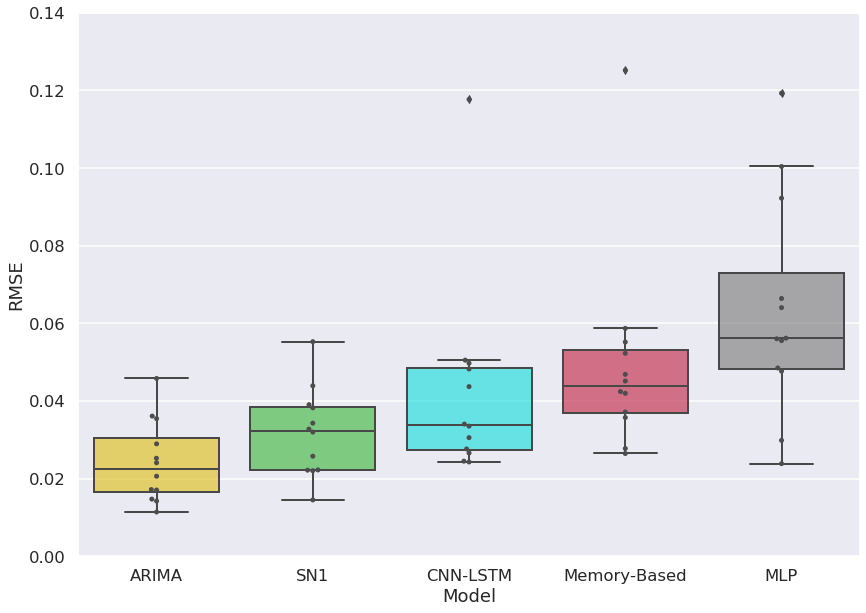

In [21]:
fig, ax4 = plt.subplots(figsize = (14,10))
sns.set(style="darkgrid", context="talk")
pal1 = {"ARIMA": "gold", "MLP": "gray", "Memory-Based":"crimson", 
       "CNN-LSTM":"cyan", "SN1":"limegreen"}
sns.boxplot(data=df, ax=ax4, x="Model", y="RMSE", linewidth=2, 
            order=['ARIMA', 'SN1', 'CNN-LSTM', 'Memory-Based', 'MLP'],
           palette=pal1)
sns.swarmplot(data=df, ax=ax4, x="Model", y="RMSE", color="0.3",
            order=['ARIMA', 'SN1', 'CNN-LSTM', 'Memory-Based', 'MLP'])
# Add transparency to colors
for patch in ax4.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .65))

plt.ylim(0, 0.14)
fig = ax4.get_figure()
fig.savefig("results4.png")